In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# from google.colab import files

# uploaded = files.upload()
# csv_filename = 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
# print(f"Uploaded file: {csv_filename}")

In [ ]:
# fri_csv = csv_filename

In [ ]:
# import pandas as pd

# df = pd.read_csv(fri_csv)
# print(df.head())

    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

In [ ]:
# # Check for missing values
# print(df.isnull().sum())

# # Handle missing values
# df = df.dropna()
# from sklearn.preprocessing import LabelEncoder

# # Check if the 'Protocol' column exists and encode it
# if 'Protocol' in df.columns:
#     label_encoder = LabelEncoder()
#     df['Protocol'] = label_encoder.fit_transform(df['Protocol'])
# print(df.head())

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3              

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225741 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225741 non-null  int64  
 1    Flow Duration                225741 non-null  int64  
 2    Total Fwd Packets            225741 non-null  int64  
 3    Total Backward Packets       225741 non-null  int64  
 4   Total Length of Fwd Packets   225741 non-null  int64  
 5    Total Length of Bwd Packets  225741 non-null  int64  
 6    Fwd Packet Length Max        225741 non-null  int64  
 7    Fwd Packet Length Min        225741 non-null  int64  
 8    Fwd Packet Length Mean       225741 non-null  float64
 9    Fwd Packet Length Std        225741 non-null  float64
 10  Bwd Packet Length Max         225741 non-null  int64  
 11   Bwd Packet Length Min        225741 non-null  int64  
 12   Bwd Packet Length Mean       225741 non-null  fl

In [ ]:
# df.columns = df.columns.str.lstrip()

In [ ]:
# df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
# X = df.drop('Label', axis=1)
# y = df['Label']

# Split the data into training and testing sets
# from sklearn.model_selection import train_test_split
# Begining of data preprocessing code added by Ahmad
df1 = pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv("/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv")
df = pd.concat([df1, df2], axis=0)

df.columns = df.columns.str.strip() # Removes unnecessary white space from column names

label = {   # Labelling the target variable with numeric values
    'BENIGN': 0,
    'DDoS': 1,
    'DoS slowloris': 1,
    'DoS Slowhttptest': 1,
    'DoS Hulk': 1,
    'DoS GoldenEye': 1,
    'Heartbleed': 2
}
df['Label'] = df['Label'].map(label) # mapping the labels to their numeric values in df
df = df.dropna() # Removing rows that contain NaN values in df
df = df.loc[:, (df != 0).any(axis=0)] # Removing columns that only contain 0s in df

def replace_port_numbers(x):
     return 1 if x == 80 else 0

df['Destination Port'] = df['Destination Port'].apply(replace_port_numbers)
df = df.sample(frac=0.2, random_state=42)
X = df.drop(columns=['Label'])
y = df['Label']

correlations = abs(X.corrwith(pd.Series(y)))
correlations = correlations.sort_values(ascending=False)
X = X.drop(correlations.index[25:], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# End of data preprocessing code added by Ahmad

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


X_train shape: (146789, 25)
X_test shape: (36698, 25)


In [5]:
import numpy as np
# Checking for infinite values in the dataset
print(np.isinf(X_train).sum())

Destination Port          0
Flow Duration             0
Bwd Packet Length Max     0
Bwd Packet Length Min     0
Bwd Packet Length Mean    0
Bwd Packet Length Std     0
Flow IAT Mean             0
Flow IAT Std              0
Flow IAT Max              0
Fwd IAT Total             0
Fwd IAT Mean              0
Fwd IAT Std               0
Fwd IAT Max               0
Min Packet Length         0
Max Packet Length         0
Packet Length Mean        0
Packet Length Std         0
Packet Length Variance    0
FIN Flag Count            0
ACK Flag Count            0
Average Packet Size       0
Avg Bwd Segment Size      0
Idle Mean                 0
Idle Max                  0
Idle Min                  0
dtype: int64


In [6]:
#statistics of the feature columns to check for unusually large values
print(X_train.describe())

       Destination Port  Flow Duration  Bwd Packet Length Max  \
count     733948.000000   7.339480e+05          733948.000000   
mean           0.477211   2.514858e+07            1929.607702   
std            0.499481   4.063499e+07            2958.257160   
min            0.000000  -1.000000e+00               0.000000   
25%            0.000000   3.040000e+02               0.000000   
50%            0.000000   1.653325e+05             111.000000   
75%            1.000000   6.063305e+07            4344.000000   
max            1.000000   1.200000e+08           19530.000000   

       Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  \
count          733948.000000           733948.000000          733948.000000   
mean               29.635544              636.630177             800.926159   
std                62.130117              900.339601            1307.956028   
min                 0.000000                0.000000               0.000000   
25%                

In [7]:
# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [8]:
# Drop rows with NaN or infinite values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [4]:
# from sklearn.decomposition import PCA

# # Set the number of components to retain 95% of the variance
# pca = PCA(n_components=0.95, random_state=42)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# print(f"New shape after PCA - X_train: {X_train.shape}, X_test: {X_test.shape}")

New shape after PCA - X_train: (733948, 2), X_test: (183488, 2)


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# from sklearn.svm import LinearSVC

# # LinearSVC model, typically faster than SVC with kernel='linear'
# linear_svc_model = LinearSVC(C=0.1, max_iter=1000)
# linear_svc_model.fit(X_train, y_train)

# # Prediction and evaluation
# y_pred = linear_svc_model.predict(X_test)
# print("Classification Report (LinearSVC):\n", classification_report(y_test, y_pred))

# Train the SVM model
svm_model = svm.SVC(kernel='linear', C=0.1)
svm_model.fit(X_train, y_train)

# On test data
y_pred = svm_model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     21455
           1       0.96      0.99      0.97     15242
           2       1.00      1.00      1.00         1

    accuracy                           0.98     36698
   macro avg       0.98      0.99      0.98     36698
weighted avg       0.98      0.98      0.98     36698



# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9773284647664723


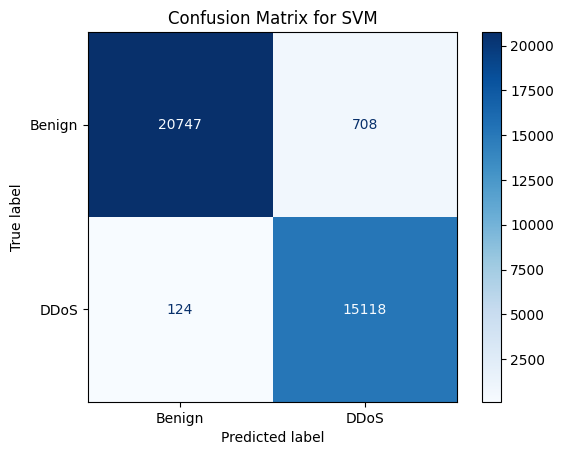

In [15]:
#Beginning of Confusion Matrix: Yesha Modi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Filter predictions and true labels to include only Benign (0) and DDoS (1)
y_test_binary = y_test[y_test.isin([0, 1])]
y_pred_binary = y_pred[np.isin(y_test, [0, 1])].flatten()

# Generate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.show()
#Ending of Confusion Matrix: Yesha Modi